# Central Limit Theorem

<font color='blue' size='3'><strong>As you take more samples, especially the large ones, your graph of sample means will look more like a normal distribution </strong></font>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed = 42
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from prettytable import PrettyTable
from IPython.display import HTML, display
plt.xkcd()

%matplotlib inline

In [4]:
df = pd.read_csv('../applied/data/train.csv')
print(f"number of data points in our population: {df.shape}")
print(f"% of missing values: {df['Purchase'].isnull().sum() * 100 / len(df)}")
df.head()      

      

number of data points in our population: (550068, 12)
% of missing values: 0.0


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Let's plot the mean and std-dev of the dataset

Number of samples in our data:: {data.shape[0]}


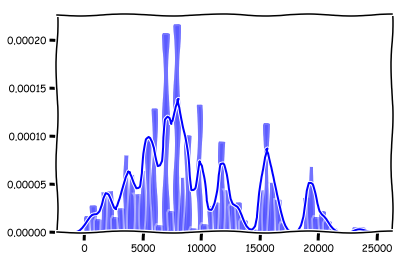

Mean:: 9263.969  Std:: 5023.061


In [6]:
data = np.array(df.Purchase.values)
print("Number of samples in our data:: {data.shape[0]}")
sns.distplot(data, color='b')
plt.show()

population_mean = np.round(data.mean(), 3)
population_std = np.round(data.std(), 3)
print(f"Mean:: {population_mean}  Std:: {population_std}")

__Now Let's take 100 samples with each of size 100, and try to plot the distribution of their 'mean'__

In [12]:
def get_mean_of_n_samples_with_m_size(data, n, m):
    sample_mean_m_samples_n_ele = []
    for i in range(n):
        samples = random.sample(range(data.shape[0]), m)
        sample_mean_m_samples_n_ele.append(data[samples].mean())
    return sample_mean_m_samples_n_ele

In [17]:
def central_limit_therorem(data, population_mean, i, j, color, key):
    sns.distplot(np.array(data), color=color, ax=axs[i, j])
    axs[i, j].axvline(population_mean, linestyle='--', color='r', label='p_mean')
    axs[i, j].axvline(np.array(data).mean(), linestyle='-.', color='g', label='s_mean')
    axs[i, j].set_title(key)
    axs[i, j].legend()
    
    

In [19]:
sample_means = dict()

In [20]:
sample_means['100samples_50ele'] = get_mean_of_n_samples_with_m_size(data, 100, 50)
sample_means['1000samples_50ele'] = get_mean_of_n_samples_with_m_size(data, 1000, 50)

sample_means['100samples_100ele'] = get_mean_of_n_samples_with_m_size(data, 100, 100)
sample_means['1000samples_100ele'] = get_mean_of_n_samples_with_m_size(data, 1000, 100)

sample_means['100samples_1000ele'] = get_mean_of_n_samples_with_m_size(data, 100, 1000)
sample_means['1000samples_1000ele'] = get_mean_of_n_samples_with_m_size(data, 1000, 1000)

__Now Let's take 1000 samples with each of size 100, and try to plot the distribution of their 'mean'__

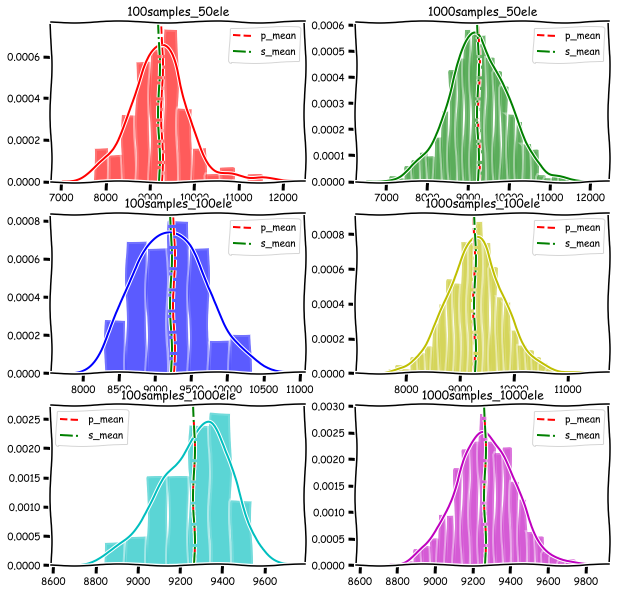

<Figure size 432x288 with 0 Axes>

In [22]:
colors = ['r','g','b','y', 'c', 'm', 'k']
plt_grid  = [(0,0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]
sample_sizes = [(100,50), (1000, 50), (100, 100), (1000, 100), (100, 1000), (100, 1000)]

fig, axs = plt.subplots(3, 2,  figsize=(10, 10))
for i, key in enumerate(sample_means.keys()):
    central_limit_therorem(sample_means[key], population_mean, plt_grid[i][0], plt_grid[i][1] , colors[i], key)
plt.show()
plt.tight_layout()


> _if we can observe the thrid row distribution plots, the larger the sample size, the more it looks like Gaussian_

__Note :__<br>
For the Central limit theorem to be valid, the samples have to be reasonably large. How large is that? It depends on how far the population distribution differs from a Gaussian distribution. Assuming the population doesn't have a really unusual distribution, a sample size of 10 or so is generally enough to invoke the Central Limit Theorem.

__Let us get the properties of these sample distributions and compare these stats with the original distribution__

In [24]:
x = PrettyTable()
x = PrettyTable(["#samples_name", "P_Mean", "Sample mean", "P_Std", "Sample Std", "mu_x"+u"\u2248"+"mu", "std_x"+u"\u2248"+"std/"+u"\u221A"+"n"])

for i, key in enumerate(sample_means.keys()):
    sample_mean = np.round(np.array(sample_means[key]).mean(), 3)
    sample_std = np.round(np.array(sample_means[key]).std(), 3)
    population_std_est = np.round(population_std / np.sqrt(sample_sizes[i][1]), 3)
    
    row = []
    row.append(key)
    row.append(population_mean)
    row.append(sample_mean)
    row.append(population_std)
    row.append(sample_std)
    row.append(str(sample_mean)+u"\u2248"+str(population_mean))
    row.append(str(sample_std)+u"\u2248"+str(population_std_est))
    x.add_row(row)
print(x)

+---------------------+----------+-------------+----------+------------+-------------------+-----------------+
|    #samples_name    |  P_Mean  | Sample mean |  P_Std   | Sample Std |      mu_x≈mu      |   std_x≈std/√n  |
+---------------------+----------+-------------+----------+------------+-------------------+-----------------+
|   100samples_50ele  | 9263.969 |   9207.618  | 5023.061 |  641.268   | 9207.618≈9263.969 | 641.268≈710.368 |
|  1000samples_50ele  | 9263.969 |   9249.296  | 5023.061 |  713.907   | 9249.296≈9263.969 | 713.907≈710.368 |
|  100samples_100ele  | 9263.969 |   9216.295  | 5023.061 |  462.132   | 9216.295≈9263.969 | 462.132≈502.306 |
|  1000samples_100ele | 9263.969 |   9282.308  | 5023.061 |  522.425   | 9282.308≈9263.969 | 522.425≈502.306 |
|  100samples_1000ele | 9263.969 |   9265.304  | 5023.061 |  154.215   | 9265.304≈9263.969 | 154.215≈158.843 |
| 1000samples_1000ele | 9263.969 |   9266.871  | 5023.061 |  154.505   | 9266.871≈9263.969 | 154.505≈158.843 |
+

<strong><font color='green'>Observations:</font></strong>
1. If you check the above stats, we can observe the distribution of sample means, is having mean <font color='red'>$\mu_{x} \approx \mu$</font> and <font color='red'>$\sigma_{x}\approx \frac{\sigma}{\sqrt{n}}$</font>

<ul style="font-family:'Georgia';font-size:18px" >
<strong>Central Limit Theorem says: </strong>
<br>
<br>
<li>
The sampling distribution of the sample mean <font color='red'>$\overline{X}$</font>  is approximately normally distributed with mean <font color='red'>$\mu$</font> and standard deviation <font color='red'>$\frac{\sigma}{\sqrt{n}}$</font>. if the original distributions are non-normal.
</li>
<br>
<li>
The larger the sample size <font color='red'>$n$</font> is, the more normally distributed the sampling distribution will be and the more tightly it will converge about the true population mean <font color='red'>$\mu$</font>.
</li>
<br>
<li>
The sampling distribution of the sample mean <font color='red'>$\overline{X}$</font> is exactly normally distributed with mean <font color='red'>$\mu$</font> and standard deviation <font color='red'>$\frac{\sigma}{\sqrt{n}}$</font> if the original distributions are normal.</li>
</ul>

# Population Mean Confidence Intervals for Larger Sampels

><strong>Note</strong>: <font color='red'>$\overline{x}$</font> is the mean of single sample,  <font color='red'>$\mu_{x}$</font> is the mean of the sampling distribution of the sample mean and <font color='red'>$\mu$</font> is the population mean

<ol style="font-size:120%;">
<li>Consider the poplulation mean is <font color='red'>$\mu$</font>, and suppose you have taken a sample and calculated its mean as <font color='red'>$\overline{x}$</font></li>
<li>Often for a given population we don't know what is the values of <font color='red'>$\mu$</font></li>
<li> Here we try to esitmate the <font color='blue'> <i>unknown</i> <font color='red'>$\mu$</font> </font>with the help of <font color='blue'> known value <font color='red'>$\overline{x}$</font> </font> </li>
</ol>

__<font  color='#7300e6'>Q: Here “Why do we need a sample mean to calculate the population mean? why can't we directly calcualte the mean of the population?” </font>__
<img src='https://i.imgur.com/rgWfmCf.png' width=150>

<font color='#339933'>
Ans: Suppose your population of interest in Delhi, and you want to know the mean age of the population.
<ul>
<li>Due to lack of time, energy, and money, you cannot obtain the age of every person in Delhi.</li> 
<li>You can select a sample (e.g. a simple random sample) and calculate the mean of that sample, <font color='red'>$\overline{x}$</font></li>
</ul>
</font>

__<font  color='#7300e6'>Q: Then “Why don’t we just use the sample mean  <font color='red'>$\overline{x}$</font> to estimate the population mean <font color='red'>$\mu$</font>?” </font>__
<img src='https://i.imgur.com/rgWfmCf.png' width=150>

<font color='#339933'>
<ul> 
<li>We can – but the sample mean <font color='red'>$\overline{x}$</font> may be quite different from the population mean <font color='red'>$\mu$</font>,even if we obtained the sample correctly.</li> 
    
<li>In addition, a single number estimate by itself, such as <font color='red'>$\overline{x}$</font>, provides no information about the precision and reliability of the estimate with respect to the larger population. </li>

</ul>
</font>

<p style="font-family:'Georgia';font-size:18px" >
Statisticians use the sample statistic <font color='red'>$\overline{x}$</font> and the population(<font color='red'>$\sigma$</font>) or sample standard deviation to provide <font color='blue'>an interval of plausible estimates</font> for the population parameter <font color='red'>$\mu$</font>. This interval is called a <font color='blue'>confidence interval.</font>
</p>

> <strong>Definition:</strong> A confidence interval is an entire interval of plausible values for a population parameter, such as <font color='red'>$\mu$</font>, based on observations obtained from a random sample of size <font color='red'>$n$</font>.

### Let us answer a question

><font color=#EB07BA > __What is the avarage money spent by Male population on black friday ?__</font>

Before we know how to estimate that lets have a look at couple of concepts
<h3>1. <font color='blue'><a href='https://en.wikipedia.org/wiki/Standard_error'>Standard error</a> </font> </h3>
<pre>
 
<li>The standard error (SE) of a statistic (usually an estimate of a parameter) is the standard deviation of its sampling distribution or an estimate of that standard deviation.</li>
<li>If the parameter or the statistic is the mean, it is called the standard error of the mean (SEM). </li>
<li>The standard error of the mean (SEM) can be expressed as: </li>
</pre>
$$\sigma_\overline{x}=\frac{\sigma}{\sqrt{n}}$$
<pre>
Since the population standard deviation is seldom known, the standard error of the mean(SEM) is usually estimated as the sample standard deviation divided by the square root of the sample size (assuming statistical independence of the values in the sample).
</pre>
$${\displaystyle {\sigma }_{\bar {x}}\ \approx {\frac {s}{\sqrt {n}}}} $$


<h3>2. <font color='blue'> $zScore$</font> and Confidence Levels:</h3>

<ul>
    <li>Let $\alpha$ be a number between 0 and 1, and let 100 * (1 – $\alpha$)% denote the confidence level.
    <br>For example, 
        <ul>
        <li>if $\alpha$ = 0.05, then the corresponding confidence level is 95%. </li>
        <li>If $\alpha$= 0.01, then the confidence level is 99%.</li>
        </ul>
    </li>
    <li>
        Suppose we have a standard normal distribution $Z$. <br>Let $z_\frac{\sigma}{2}$ denote a $zScore$ with α/2 probability to its right. <br>Similarly let -$z_\frac{\sigma}{2}$ denote a $zScore$ with α/2 probability to its left.
    </li>
    <li> Example: <img src='https://i.imgur.com/mntg6h2.png' width=700>
        The value $z_{0.10}$ is the positive z-score that has α/2 = 0.1 probability to its right. The desired $zScore$ is 1.282. <br>The value $-z_{0.25}$ is the negative z-score that has α/2 = 0.25 probability to its left. The
desired $zScore$ is -0.6745.

</ul>



In [27]:
# https://stackoverflow.com/a/20864883/4084039
import scipy.stats as st
print(f"zScore for 0.1 probability to right is:: {st.norm.ppf(1 - 0.10)}")
print(f"zScore for 0.25 probability to left is:: {st.norm.ppf(0.25)}")


zScore for 0.1 probability to right is:: 1.2815515655446004
zScore for 0.25 probability to left is:: -0.6744897501960817


<strong>Note:</strong> the data we have in hand might not included all the purchases that are made, and assume we have given the whole <font color='blue'>population standard deviation as 5051.</font>

In [32]:
# we are taking a sample of male persons and calculating their mean

data_male = np.array(df[df['Gender']=='M']['Purchase'].values)
samples = random.sample(range(data_male.shape[0]), 100)
print(f"the mean of money spent by sample set of 100 males:: {data_male[samples].mean()}")
print(f"Given that the we have population standard deviation : 5051")

print(f"From central limit theorem we can say that, the std of sampling distribution of the sample mean is \u03C3/\u221An : {5051/10}") # 10 is sqrt of 100

the mean of money spent by sample set of 100 males:: 9504.65
Given that the we have population standard deviation : 5051
From central limit theorem we can say that, the std of sampling distribution of the sample mean is σ/√n : 505.1


<img src='https://i.imgur.com/vXSIeng.jpg'>

<html>
<body>

__We know that in normal distribution, given a data point there is $95\%$ probability that it will be within the range [ <font color='red'>$\mu-2\sigma$</font>, <font color='red'>$\mu+2\sigma$</font>]__

<ul>
    <li>The sampling distribution of the sample means is a normal distribution</li>
    <li>Any sample mean we take <font color='red'>$\overline{x}$</font> it is 95% probability that it will be within the range [ <font color='red'>$\mu_{x}-2\sigma_{x}$</font>, <font color='red'>$\mu_{x}+2\sigma_{x}$</font>] $i.e.$ for every 100 sample means typically 95 of them are in this range [ <font color='red'>$\mu_{x}-2\sigma_{x}$</font>, <font color='red'>$\mu_{x}+2\sigma_{x}$</font>]</li>
    <li>It is similar to that for any sample mean we take <font color='red'>$\overline{x}$</font> it is 95% probability that the range [ <font color='red'>$\overline{x}-2\sigma_{x}$</font>, <font color='red'>$\overline{x}+2\sigma_{x}$</font>] will contain distribution mean <font color='red'>$\mu_{x} [\approx \mu]$</font>.
    </li>
</ul>

</body>
</html>




<font color='brown'><b>Question:</b></font> Choose the best interpretation of a 95% confidence interval for the population mean μ? <br>
<font color='blue'><b>Option 1:</b></font> If repeated random samples were taken and the 95% confidence interval was computed for each sample, 95% of the intervals would contain the population mean. <br>
<font color='blue'><b>Option 2:</b></font> The probability that the population mean μ is in the confidence interval is 0.95 <br>
<font color='blue'><b>Option 3:</b></font> 95% of the population distribution is contained in the confidence interval.
<br><br>
<font color='green'><b>Answer:</b></font> The correct answer is <font color='green'><b>Option 1</b></font> please check the above 3 points, <font color='red'><b>Option 2</b></font> is incorrect because it places the probability on $\mu$, instead of on the confidence interval. <font color='red'><b>Option 3</b></font> is incorrect since the confidence interval for the population mean is built using sample means and not values from the population distribution. Using population distribution values would give us a confidence interval that is wider than the one for the population mean.

<font size='3'>From the above equations Let us construct an intravel [<font color='red'>$\overline{x}$- 2\*505.1, $\overline{x}$+2\*505.1</font>] = [<font color='red'> $\overline{x}$- 2\*$\frac{\sigma}{\sqrt{n}}$, $\overline{x}$+2\*$\frac{\sigma}{\sqrt{n}}$</font>]</font>

In [37]:
def plt_confidence_interval(data, sample_mean, population_std, i, j, color):
    sns.distplot(data, color=color, ax=axs[i, j])
    axs[i, j].axvline(data.mean(), linestyle="-", color='k', label="p_mean")
    axs[i, j].axvline(sample_mean, linestyle="--", color='m', label="s_mean")
    axs[i, j].axvline(sample_mean + 2*(population_std/np.sqrt(100)), linestyle=":", color='g', label="s_mean+2*SE")
    axs[i, j].axvline(sample_mean - 2*(population_std/np.sqrt(100)), linestyle=":", color='g', label="s_mean-2*SE")
    axs[i, j].legend()
    
    

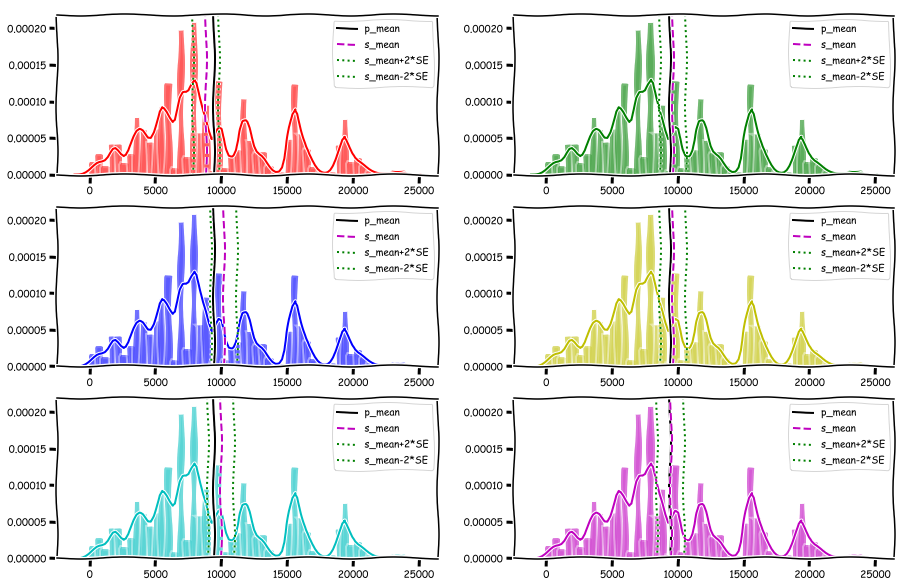

In [38]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
for i in range(6):
    sample = data_male[random.sample(range(data_male.shape[0]), 100)]
    plt_confidence_interval(data_male, np.array(sample).mean(), population_std, plt_grid[i][0], plt_grid[i][1], colors[i])
plt.show()
    
    
    

> In the above figure, the red line shows the sample mean <font color='red'>$\overline{x}$</font> and the two green lines shows [<font color='red'> $\overline{x}$- 2\*$\frac{\sigma}{\sqrt{n}}$, $\overline{x}$+2\*$\frac{\sigma}{\sqrt{n}}$</font>]

<p style="font-family:'Georgia';font-size:22px" >Note: We have a big Assumption that, we know the population standard deviation as 5051.</p>

## Confidence interval when don't have knowldge about population standard deviation